<class 'pandas.core.frame.DataFrame'>


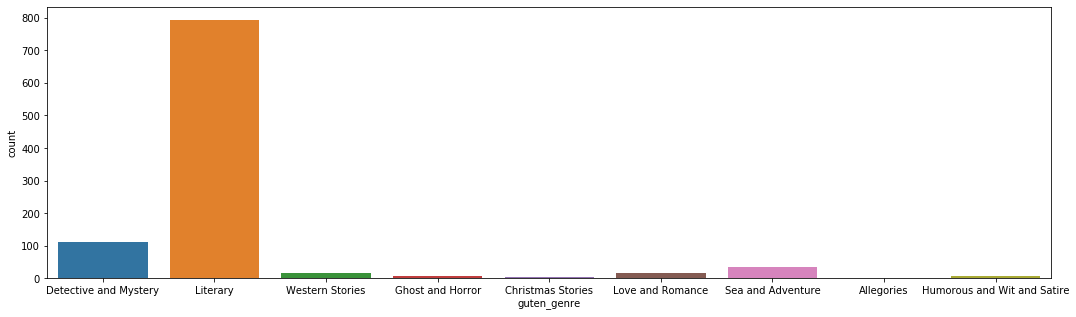

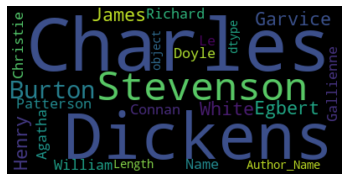

,File_Name,Data,FileNo,Book_Name,book_id,guten_genre,Author_Name
0,Books\pg105JaneAusPersuatn-content.html,"<p>Sir Walter Elliot, of Kellynch Hall, in Som...",105,Persuasion,pg105JaneAusPersuatn.epub,Literary,Austen| Jane
1,Books\pg108DoyleReturnSherlk-content.html,<p>It was in the spring of the year 1894 that ...,108,Return of Sherlock Holmes,pg108DoyleReturnSherlk.epub,Detective and Mystery,Connan| Doyle
2,Books\pg11CarolAlice-content.html,<p>Alice was beginning to get very tired of si...,11,Alice's Adventures in Wonderland,pg11CarolAlice.epub,Literary,Carroll| Lewis
3,Books\pg12CarolGlassLook-content.html,"<p>One thing was certain, that the white kitte...",12,Through the Looking-Glass,pg12CarolGlassLook.epub,Literary,Carroll| Lewis
4,Books\pg98DickensTaleCities-content.html,<p>!!!!Â Â Book the First - Recalled to Life I...,98,A Tale of Two Cities,pg98DickensTaleCities.epub,Literary,Dickens| Charles


In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import numpy as np
import re

"""importing csv file with names and authors"""

data = pd.read_csv("master996.csv", delimiter=';',encoding= 'unicode_escape')

#print(data.head(5))
#data.shape
#data.count()

print(type(data))

data['FileNo'] = data['book_id'].str.replace(r'\D+', '').astype(int)

"""checking overall values"""


#print(data.describe())

"""checking null values counts"""

#print(data.info())
#data.guten_genre.unique()
#print(data.Author_Name.unique())
#data.guten_genre.describe()

"""plotting"""

plt.figure(figsize=(18,5))

"""count plot of genre"""

sns.countplot(data['guten_genre'])
#sns.countplot(data['Author_Name'])
#sns.pairplot(data, vars=["guten_genre", "Author_Name"])
#sns.countplot(data['Author_Name'])
#sns.pairplot(data, hue='guten_genre')

plt.show()

"""Wordcloud to see most frequent author"""
stopwords = set(STOPWORDS)
x = data['guten_genre']
wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(str(data['Author_Name']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


"""joining data frames"""


import glob
import pandas as pd
import re

"""getting all files and its names into dict and then converting to dataframe"""

con = {}

files = glob.glob("Books\*.html")
for f in files:
    with open(f,'r') as myfile:
        con[f]=myfile.read()
        
"""for i in data:
    print(i, data[i])
""" 
df = pd.DataFrame.from_dict(con,orient='index').reset_index()
df.columns = ['File_Name', 'Data']
df['FileNo'] = df['File_Name'].str.replace(r'\D+', '').astype(int)

left = df
right = data

#print(type(df))

#left.head(5)
#right.head(5)
result = pd.merge(left, right , how='inner', on=['FileNo', 'FileNo'])

result.head(5)






                                                 Count
Author_Name               guten_genre                 
Abbott| Belle K.          Literary                   1
Abbott| Eleanor Hallowell Detective and Mystery      1
Abbott| Keene             Literary                   1
Adams| Mrs. H. A.         Literary                   1
Adams| Mrs. J. S.         Allegories                 1
(555, 1)


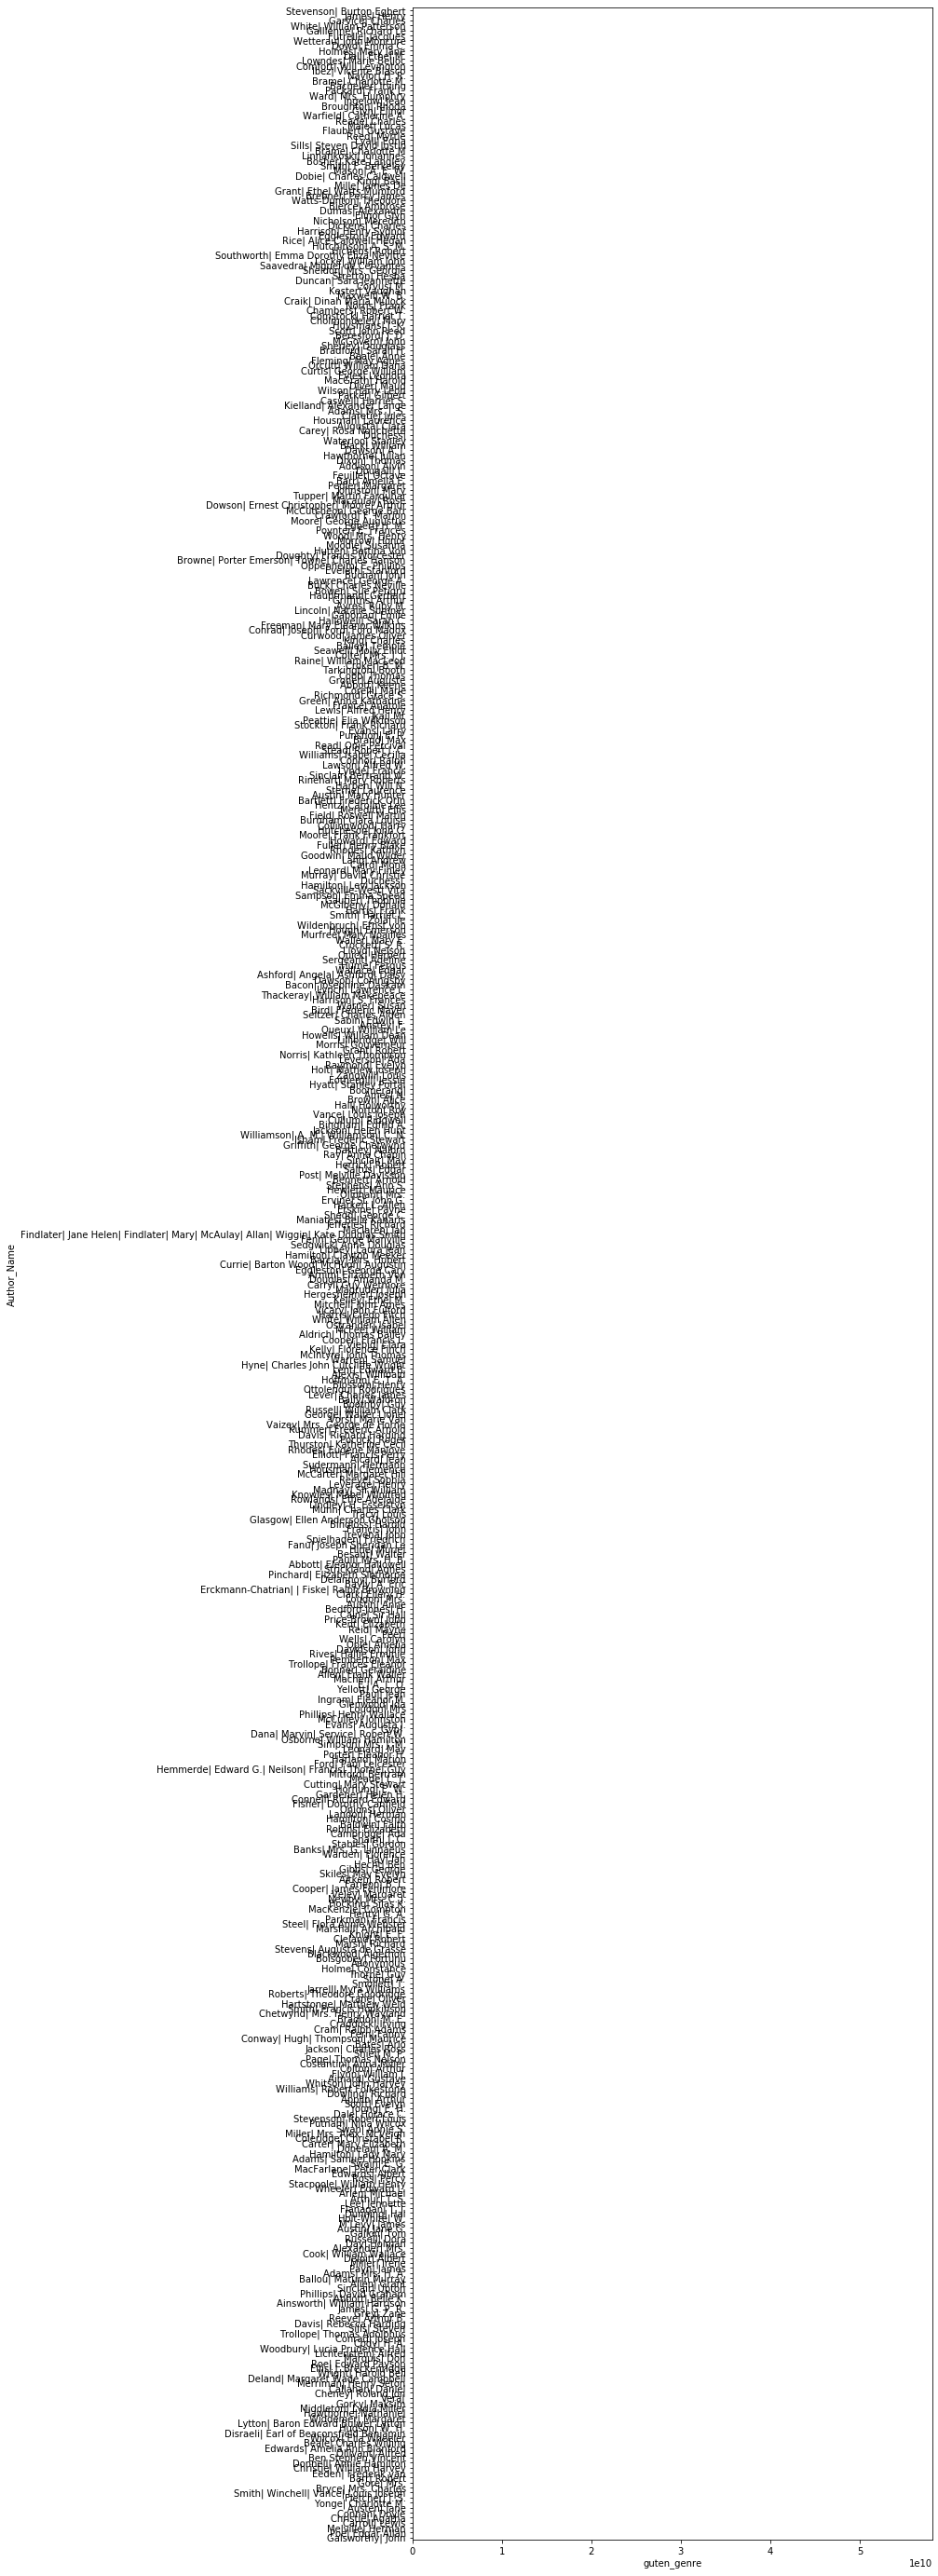

In [96]:
"""group by authors"""

"""checking distribution of gernre by author"""
gr_auth_gen = data.groupby('Author_Name')['guten_genre'].value_counts().to_frame()
gr_auth_gen.columns = [*gr_auth_gen.columns[:-1], 'Count']
print(gr_auth_gen.head(5))
print(gr_auth_gen.shape)

"""checking how many books an author has written"""
#gr_auth_id = data.groupby('Author_Name')['book_id'].value_counts()

plt.figure(figsize=(10,50))
sns.barplot(x=data.groupby('Author_Name')['guten_genre'].value_counts(), y=data['Author_Name'], data=data)
plt.show()




In [148]:
from bs4 import BeautifulSoup

"reading one html file to text file"
path = 'pg105JaneAusPersuatn-content.html'
with open(path, 'rt') as myfile:
    data = myfile.read().replace("<br>", '\n')
    soup = BeautifulSoup(data)

#print(soup.get_text())


"""get all the files from dir in a list"""

import glob
import pandas as pd

data = []

files = glob.glob("Books\*.html")
for f in files:
    with open(f,'r') as myfile:
        data.append(myfile.read())
        
df = pd.DataFrame(data)
df.head()

,0
0,"<p>Sir Walter Elliot, of Kellynch Hall, in Som..."
1,<p>It was in the spring of the year 1894 that ...
2,<p>Alice was beginning to get very tired of si...
3,"<p>One thing was certain, that the white kitte..."
4,<p>!!!!Â Â Book the First - Recalled to Life I...


In [28]:
import glob
import pandas as pd
import re

"""getting all files and its names into dict and then converting to dataframe"""

data = {}

files = glob.glob("Books\*.html")
for f in files:
    with open(f,'r') as myfile:
        data[f]=myfile.read()
        
"""for i in data:
    print(i, data[i])
""" 
df = pd.DataFrame.from_dict(data,orient='index').reset_index()
df.columns = ['File_Name', 'Data']
df['FileNo'] = df['File_Name'].str.replace(r'\D+', '').astype(int)

result = pd.merge(left, right, how='left', on=['key1', 'key2'])

df.head(5)


,File_Name,Data,FileNo
0,Books\pg105JaneAusPersuatn-content.html,"<p>Sir Walter Elliot, of Kellynch Hall, in Som...",105
1,Books\pg108DoyleReturnSherlk-content.html,<p>It was in the spring of the year 1894 that ...,108
2,Books\pg11CarolAlice-content.html,<p>Alice was beginning to get very tired of si...,11
3,Books\pg12CarolGlassLook-content.html,"<p>One thing was certain, that the white kitte...",12
4,Books\pg98DickensTaleCities-content.html,<p>!!!!Â Â Book the First - Recalled to Life I...,98


In [3]:
import re
str1 = 'Books\pg105JaneAusPersuatn-content.html'
print (re.findall("\d+", str1))

['105']
